### Salman Rashid K V - DSML December Batch

## Business Case : Yulu - Hypothesis Testing

### About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

### Business Problem
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### Problem Statement
- Study the data set for data cleaning and preprocessing
- Detect outliers in the data set using describe function and boxplot
- Understand the distribution of data for the quantitative attributes
- Understand correlations of data among the quantitative attributes
- Univariate, bivariate & multivariate analysis to check relationship between different features
- Peform the Hypothesis testing for different features for business recommendations
- Chi-square test
    - To check if weather is dependent on the season
    - To check if working day is dependent on the season
- ANOVA test    
    - To check if no. of bikes rented is similar or different across various season
    - To check if no. of bikes rented is similar or different across various weather

### Data Information

**Data set**
- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not 
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
    - 1: Clear, Few clouds, partly cloudy, partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered


## Basic Data Exploration

### Importing the libraries

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Reading the dataset

In [424]:
df=pd.read_csv('bike_sharing.txt')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Shape of the dataset

In [6]:
df.shape

(10886, 12)

- Number of rows = 10886
- Number of columns = 12

### Attributes of the dataset

In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Data types of the attributes

In [425]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

#### Converting required object data types to date time

In [426]:
df['datetime'] = pd.to_datetime(df['datetime'])

### Overall information of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Checking for null values

In [11]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**There are no occurence of null values in the data set**

### No. Of Unique Values in each columns

In [14]:
for i in df.columns:
    print(i,':',df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


### Value count of each columns

In [16]:
for i in df.columns:
    print(i,':\n',df[i].value_counts())

datetime :
 2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64
season :
 4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
holiday :
 0    10575
1      311
Name: holiday, dtype: int64
workingday :
 1    7412
0    3474
Name: workingday, dtype: int64
weather :
 1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
temp :
 14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19

### The statistical summary of numerical values in the dataset

In [12]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- we can see that features casual, registered and count the values of corresponding mean and median differ by large values, so we need to find outlayer of these features

## Managing the Outliers

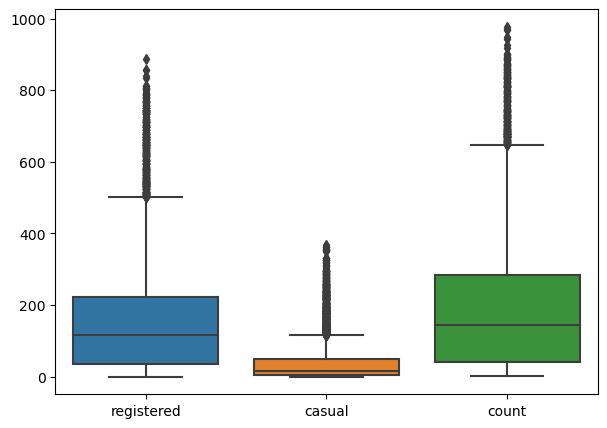

In [395]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df[['registered','casual','count']])
plt.show()

In [393]:
outliers=df.copy()
attrs=['registered','casual','count']
for i in attrs:
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    print('inter quartile range of',i,'=',iqr)
    print('lower limit of',i,'=',lower)
    print('upper limit of',i,'=',upper)
    print('----------------------------------------------------------------')
    outliers=outliers[~((outliers[i]<lower)|(outliers[i]>upper))]
print('\033[1m'+'\n\nData frame after outlier detection')    
outliers

inter quartile range of registered = 186.0
lower limit of registered = -243.0
upper limit of registered = 501.0
----------------------------------------------------------------
inter quartile range of casual = 45.0
lower limit of casual = -63.5
upper limit of casual = 116.5
----------------------------------------------------------------
inter quartile range of count = 242.0
lower limit of count = -321.0
upper limit of count = 647.0
----------------------------------------------------------------


Data frame after outlier detection


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


**After the removal of outliers, the number of rows in the dataframe has reduced 10,886 to from 9,744**

## Correlation of the quantitative data

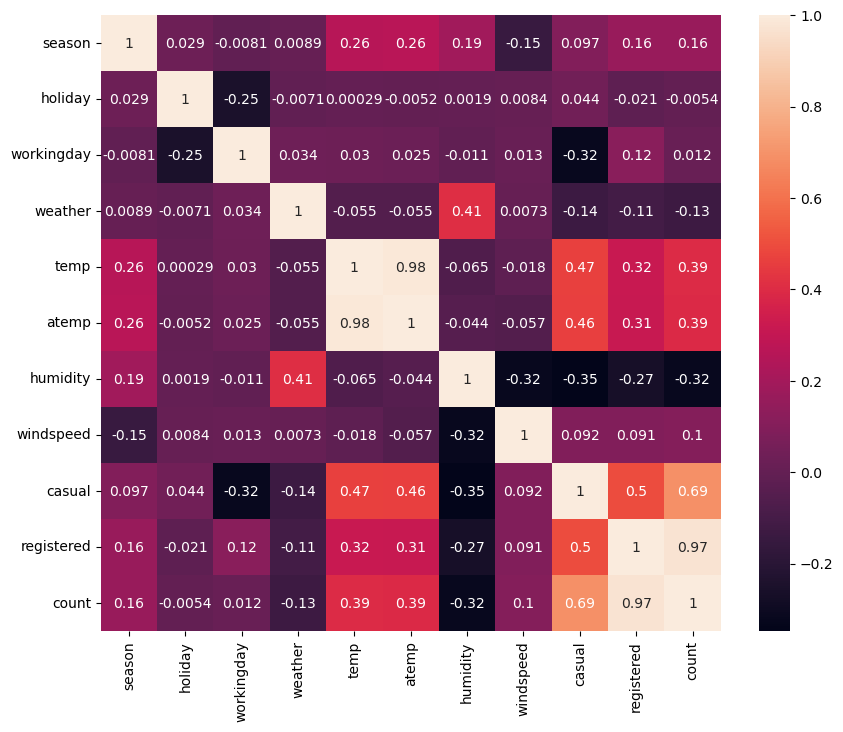

In [433]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Univariate Analysis

**Distribution of the quantitive data**

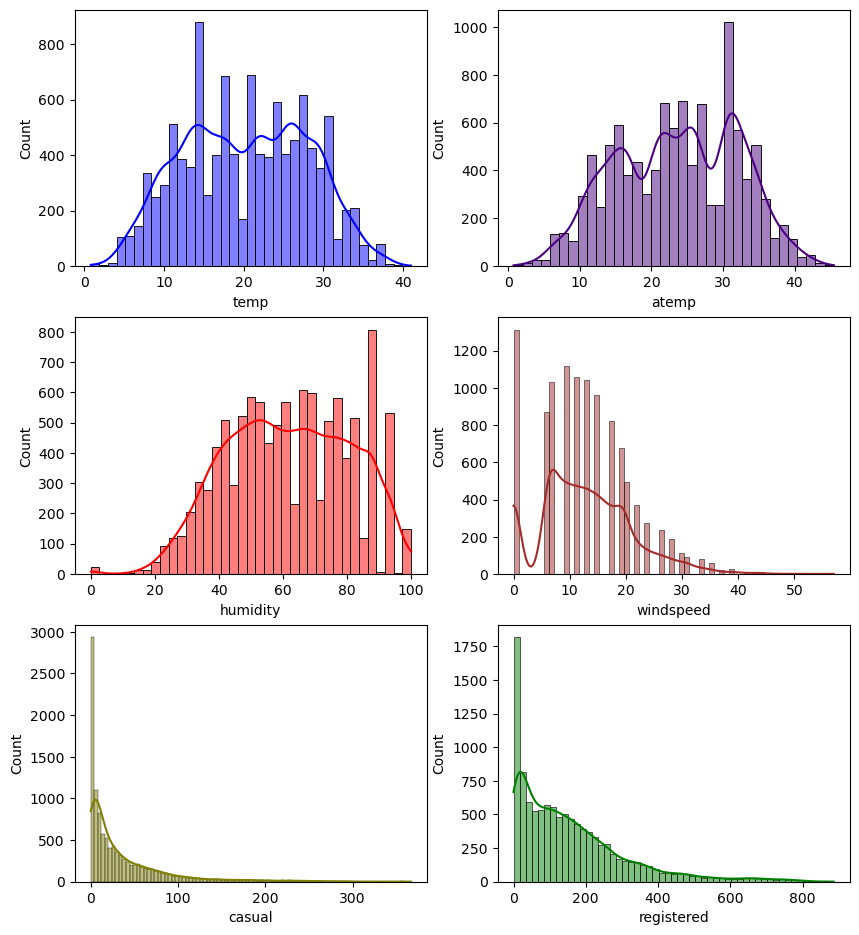

In [34]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df, x="temp", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df, x="atemp", kde=True,color="indigo", ax=axis[0,1])
sns.histplot(data=df, x="humidity", kde=True,color="red", ax=axis[1,0])
sns.histplot(data=df, x="windspeed", kde=True,color="brown", ax=axis[1,1])
sns.histplot(data=df, x="casual", kde=True,color="olive", ax=axis[2,0])
sns.histplot(data=df, x="registered", kde=True,color="green", ax=axis[2,1])
plt.show()

From the above distributions we can observe that :
- casual, registered and count somewhat looks like Log Normal Distrinution
- temp, atemp and humidity looks like they follows the Normal Distribution
- Most values for temprature lies in the range of 10 - 40.
- Most values for atemp lies in the range of 5 - 35.
- Most values for humidity percentage lies in the range of 30 -100
- Most values for windspeed lies in the range of 5 - 30.
- Most values for casual users lies in the range of 0 - 100
- Most values for registered users lies in the range of 0 - 400.

## Bivariate Analysis

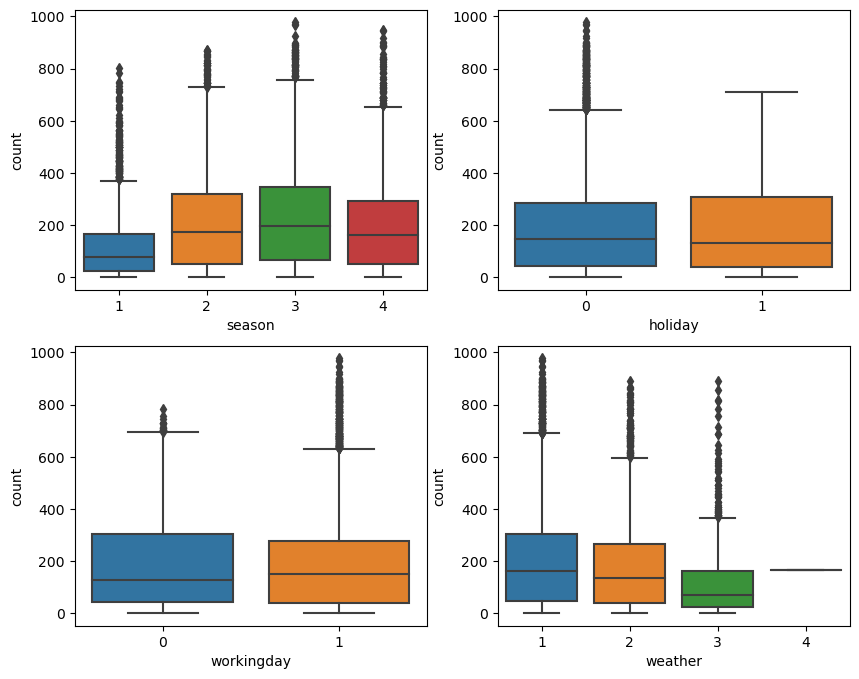

In [438]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
attr= ['season', 'holiday', 'workingday', 'weather']
index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=attr[index], y='count', ax=axis[row, col])
        index += 1    
plt.show()

- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

## Dependence of weather on total user count

In [174]:
x = pd.DataFrame({'sum' : df.groupby('weather')['count'].sum().sort_values(ascending=False),
                'mean': df.groupby('weather')['count'].mean().sort_values(ascending=False)})
weather_count = x.reset_index()
weather_count

,weather,sum,mean
0,1,1476063,205.236791
1,2,507160,178.955540
2,3,102089,118.846333
3,4,164,164.000000


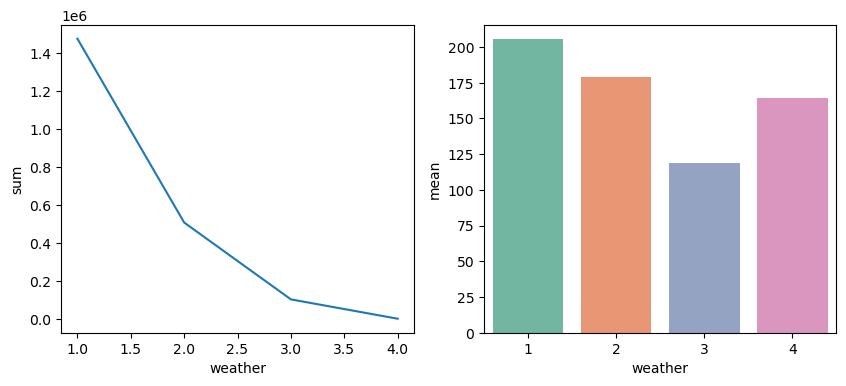

In [175]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.lineplot(data=weather_count, x='weather', y='sum')
plt.subplot(122)
sns.barplot(data=weather_count, x='weather', y='mean', palette='Set2')
plt.show()

1: Clear, Few clouds, partly cloudy <br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>

- Most number of bike rentals prefer clear/partly cloudy weather
- Number of bike rentals are the least when there is heavy rain/thunderstorm

## Dependence of season on total user count

In [176]:
x = pd.DataFrame({'sum' : df.groupby('season')['count'].sum().sort_values(ascending=False),
                'mean': df.groupby('season')['count'].mean().sort_values(ascending=False)})
season_count = x.reset_index()
season_count

,season,sum,mean
0,3,640662,234.417124
1,2,588282,215.251372
2,4,544034,198.988296
3,1,312498,116.343261


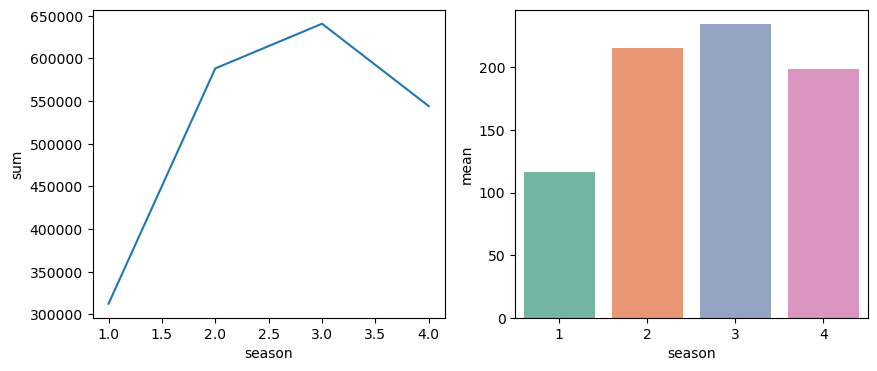

In [177]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.lineplot(data=season_count, x='season', y='sum')
plt.subplot(122)
sns.barplot(data=season_count, x='season', y='mean', palette='Set2')
plt.show()

1: spring<br> 2: summer<br> 3: fall<br> 4: winter<br>
- No of bike rentals during fall season is the highest
- No of bike rentals during season 2,3,4 is almost same
- No of bike rentals during spring season is the lowest

## Dependence of temperature on total user count

In [178]:
x = pd.DataFrame({'sum' : df.groupby('temp')['count'].sum().sort_values(ascending=False),
                'mean': df.groupby('temp')['count'].mean().sort_values(ascending=False)})
temp_count = x.reset_index()
temp_count

,temp,sum,mean
0,0.82,544,77.714286
1,1.64,183,91.500000
2,2.46,215,43.000000
3,3.28,212,19.272727
4,4.10,2212,50.272727
5,4.92,3505,58.416667
6,5.74,5696,53.233645
7,6.56,9944,68.109589
8,7.38,7182,67.754717
9,8.20,18777,81.995633


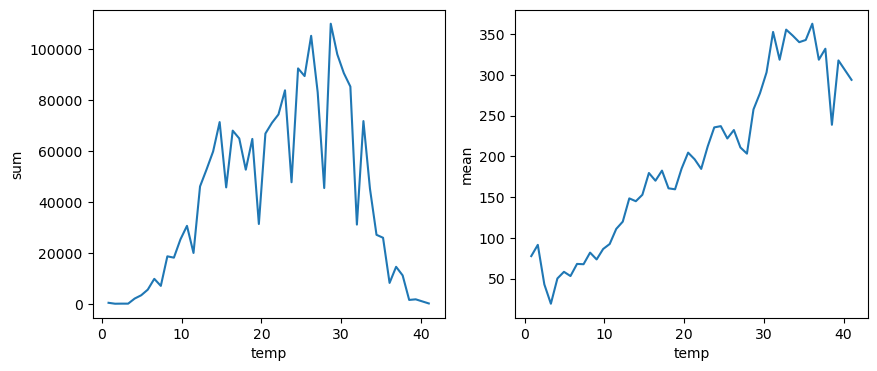

In [187]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.lineplot(data=temp_count, x='temp', y='sum')
plt.subplot(122)
sns.lineplot(data=temp_count, x='temp', y='mean')
plt.show()

- There is a gradual increase in average no. of users with increase in temperature
- Most of the users are in the temperature range between 15 to 40 degree celsius
- Whenever the temperature is less than 10 or greater than 35 number of bikes rented is less


## Dependence of feeling temperature on total user count

In [181]:
x = pd.DataFrame({'sum' : df.groupby('atemp')['count'].sum().sort_values(ascending=False),
                'mean': df.groupby('atemp')['count'].mean().sort_values(ascending=False)})
atemp_count = x.reset_index()
atemp_count

,atemp,sum,mean
0,0.760,2,1.000000
1,1.515,3,3.000000
2,2.275,266,38.000000
3,3.030,576,82.285714
4,3.790,625,39.062500
5,4.545,727,66.090909
6,5.305,1580,63.200000
7,6.060,4736,64.876712
8,6.820,3552,56.380952
9,7.575,4195,55.933333


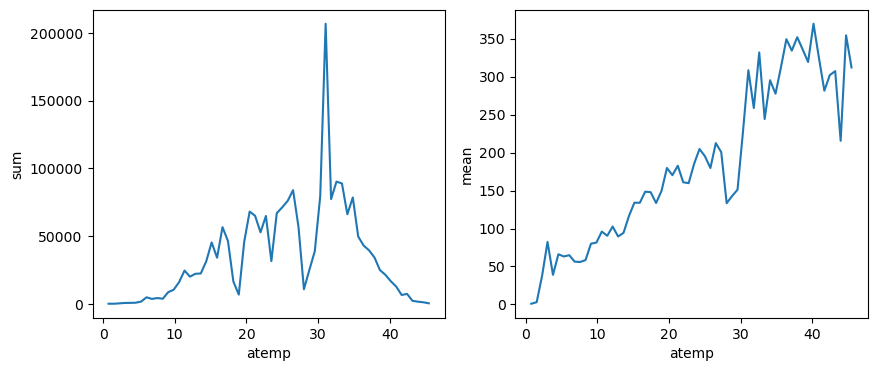

In [186]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.lineplot(data=atemp_count, x='atemp', y='sum')
plt.subplot(122)
sns.lineplot(data=atemp_count, x='atemp', y='mean')
plt.show()

- Most of the users have feeling temperature in the range of 20 to 40 degree celsius
- There is a gradual increase in no. of users with increese in temperature
- When the feeling temperture is between 30 and 35, number of bikes rented is very very high

## Dependence of humidity on total user count

In [184]:
x = pd.DataFrame({'sum' : df.groupby('humidity')['count'].sum().sort_values(ascending=False),
                'mean': df.groupby('humidity')['count'].mean().sort_values(ascending=False)})
humidity_count = x.reset_index()
humidity_count

,humidity,sum,mean
0,0,623,28.318182
1,8,77,77.000000
2,10,107,107.000000
3,12,29,29.000000
4,13,17,17.000000
...,...,...,...
84,93,14586,71.151220
85,94,28666,88.475309
86,96,71,71.000000
87,97,64,64.000000


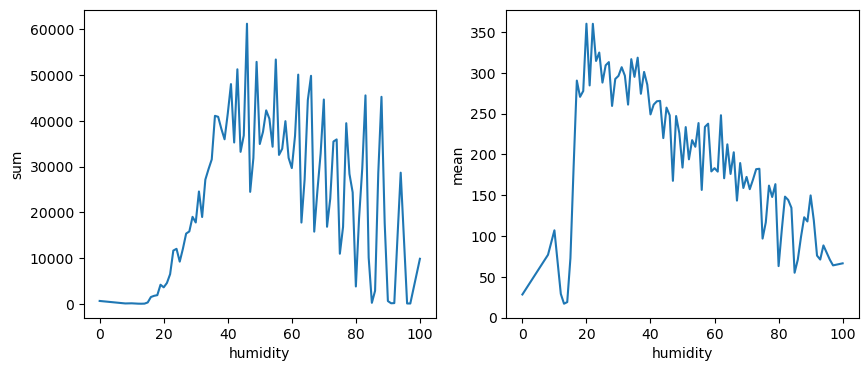

In [185]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.lineplot(data=humidity_count, x='humidity', y='sum')
plt.subplot(122)
sns.lineplot(data=humidity_count, x='humidity', y='mean')
plt.show()

- Most of the users are in the humidity range between 30 to 50
- Average user count are highest in the humidity range between 20 to 40
- Whenever the humidity is less than 20, number of bikes rented is very very low

## Dependence of wind speed on total user count

In [188]:
x = pd.DataFrame({'sum' : df.groupby('windspeed')['count'].sum().sort_values(ascending=False),
                'mean': df.groupby('windspeed')['count'].mean().sort_values(ascending=False)})
windspeed_count = x.reset_index()
windspeed_count

,windspeed,sum,mean
0,0.0000,211526,161.101295
1,6.0032,128938,147.864679
2,7.0015,175627,169.852031
3,8.9981,196723,175.645536
4,11.0014,213791,202.262062
5,12.9980,210744,202.249520
6,15.0013,202611,210.833507
7,16.9979,177034,214.847087
8,19.0012,147403,218.051775
9,19.9995,110816,225.235772


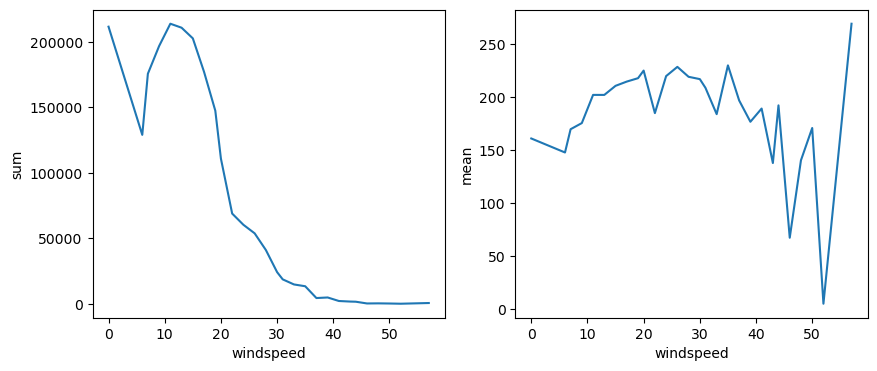

In [189]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.lineplot(data=windspeed_count, x='windspeed', y='sum')
plt.subplot(122)
sns.lineplot(data=windspeed_count, x='windspeed', y='mean')
plt.show()

- Whenever the windspeed is greater than 35, number of bikes rented is less
- most of the bike rental happened when the windspeed is in the range between 0 to 25
- Average count of the bike rental are higher in the windspeed range between 0 to 40

## Adding features like year, month, day, hour from datetime column

In [341]:
df1=df.copy()

In [342]:
df1['weekday'] = df1['datetime'].dt.day_name()
df1['year'] = df1['datetime'].dt.year
df1['month'] = df1['datetime'].dt.month_name()
df1['day'] = df1['datetime'].dt.day
df1['hour'] = df1['datetime'].dt.hour
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Saturday,2011,January,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Saturday,2011,January,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Saturday,2011,January,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Saturday,2011,January,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Saturday,2011,January,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,2012,December,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,2012,December,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,2012,December,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,2012,December,19,22


## Distribution of bike rental across the years

Text(0.5, 1.0, 'Year distribution of counts')

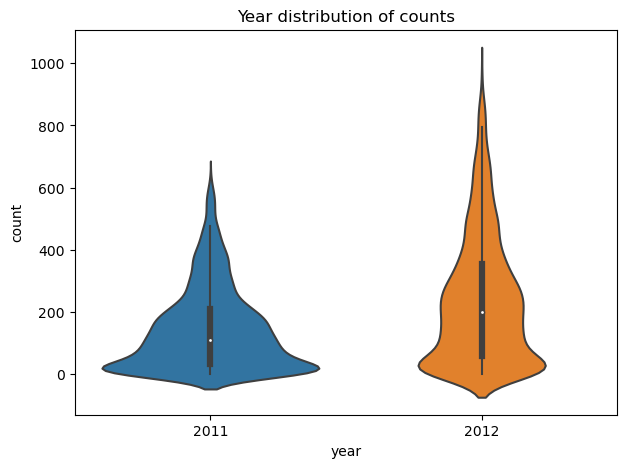

In [376]:
plt.figure(figsize=(7,5))
sns.violinplot(data=df1, x='year',y='count')
plt.title("Year distribution of counts")

- There are data of number of bike rentals across 2 years, 2011 and 2012
- The number of users in the year 2012 is much higher than that of the year 2011

## Average no. of users per week and per month

In [421]:
weekday_count_df = df1.groupby('weekday')['count'].mean().sort_values(ascending=False).reset_index()
month_count_df = df1.groupby('month')['count'].mean().sort_values(ascending=False).reset_index()
weekday_count_df

,weekday,count
0,Friday,197.844343
1,Thursday,197.296201
2,Saturday,196.665404
3,Monday,190.390716
4,Tuesday,189.723847
5,Wednesday,188.411348
6,Sunday,180.839772


In [344]:
month_count_df

,month,count
0,June,242.031798
1,July,235.325658
2,August,234.118421
3,September,233.805281
4,October,227.699232
5,May,219.459430
6,November,193.677278
7,April,184.160616
8,December,175.614035
9,March,148.169811


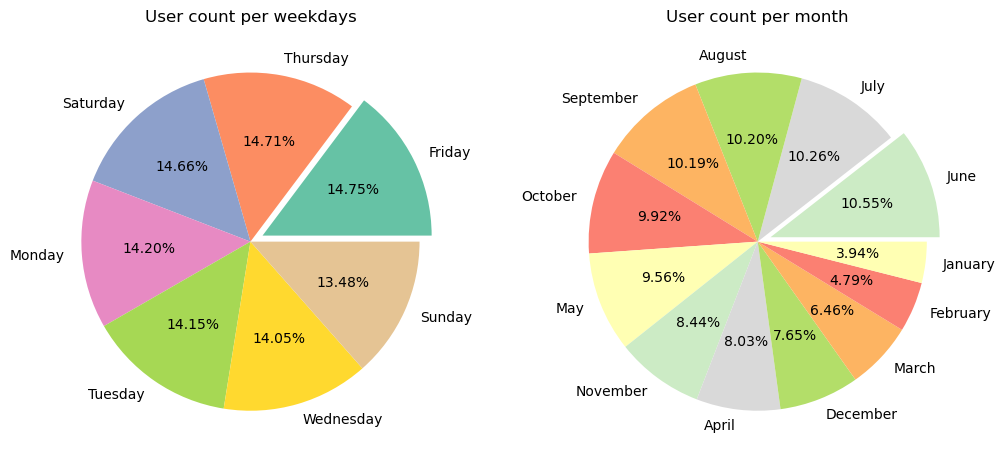

In [345]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

palette_color = sns.color_palette('Set2')
axs[0].pie(data=weekday_count_df, x=weekday_count_df['count'], colors=palette_color, labels=['Friday','Thursday','Saturday', 'Monday', 'Tuesday','Wednesday','Sunday'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
axs[0].set_title("User count per weekdays")

palette_color = sns.color_palette('Set3_r')
axs[1].pie(data=month_count_df, x=month_count_df['count'], colors=palette_color, labels=['June', 'July','August', 'September', 'October', 'May','November','April','December','March','February','January' ], explode=(0.08,0,0,0,0,0,0,0,0,0,0,0), autopct='%0.2f%%')
axs[1].set_title("User count per month")
plt.show()

- We can see that on each day of the week, average no. for rental of the bikes are almost the same
- Most bike rental happened in the month of June followed by July, with the least being in the month of January

## Multivariate Analysis

### Distribution of no. of users across the season between the years

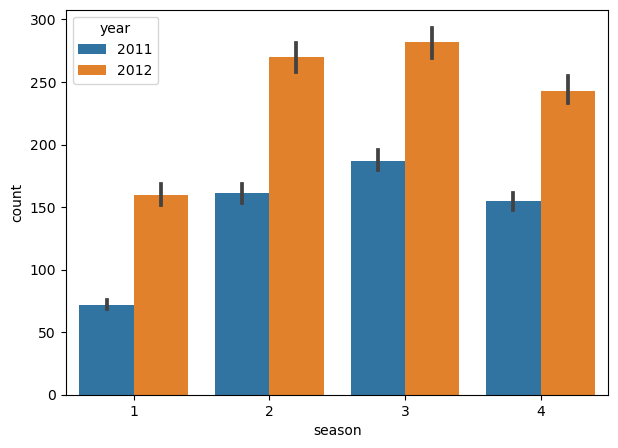

In [346]:
plt.figure(figsize=(7,5))
sns.barplot(data=df1, x='season',y='count',hue='year')
plt.show()

- Most number of rental happened during summer(2) and fall(3) seasons
- Least bike rental occured in spring(1) season
- Number of users are higher in the year 2012 across all the seasons

## No. of rentals across every season for casual and registered users

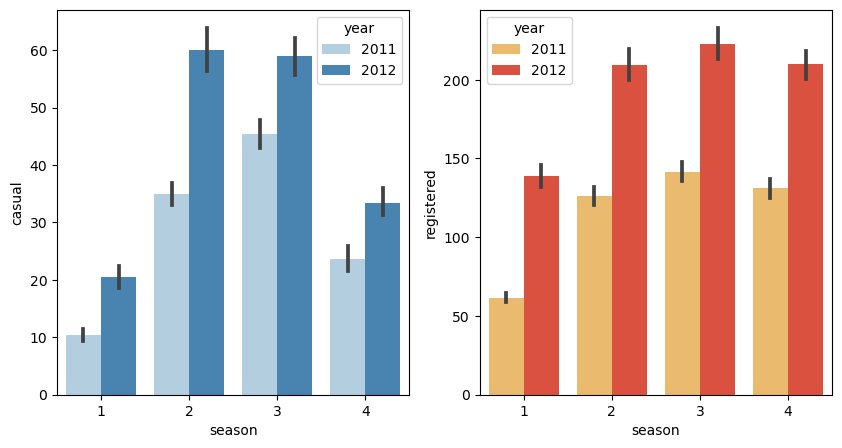

In [403]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.barplot(x='season',y='casual',hue='year',data=df1,palette='Blues')
plt.subplot(122)
sns.barplot(x='season',y='registered',hue='year',data=df1,palette='YlOrRd')
plt.show()

- Both registered and casual bike users followed the similar trend for the number of rentals across the years
- Most number of rental happened during summer(2), fall(3) seasons and least occured in spring(1) season

## Distribution of users across weather for working days

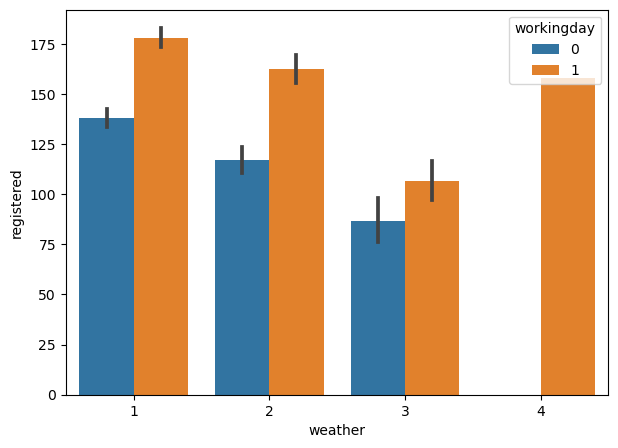

In [445]:
plt.figure(figsize=(7,5))
sns.barplot(data=df1,x='weather',y='registered',hue='workingday')
plt.show()

- For each weather conditions working days have most number of users
- There are bike rental for a holiday if the weather is heavy rain or thunderstorm(4)

## Variation of no. of users for each month across different seasons

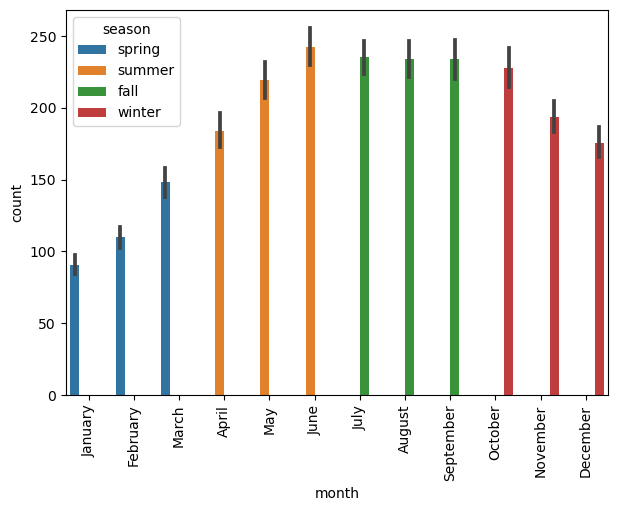

In [338]:
plt.figure(figsize=(7,5))
sns.barplot(data=df1, x='month',y='count')
plt.xticks(rotation=90)
plt.show()

- Season 2 and 3 has the highest number of bike rentals (summer and fall)
- Season 1 has the lowest number of bike rentals (spring)
- Most rentals of bike happened in between May and September
- Least rentals of bike happened during January and February

## Bike rental hour with most demand on a given day

<AxesSubplot:xlabel='hour'>

<Figure size 1500x500 with 0 Axes>

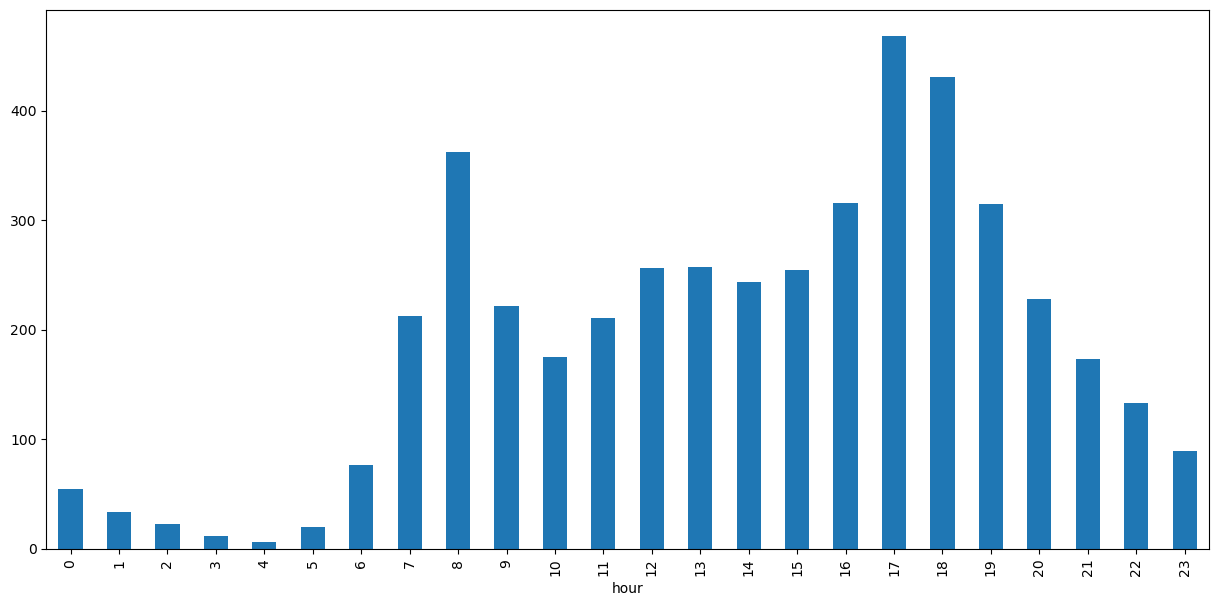

In [447]:
plt.figure(figsize=(15,5))
df1.groupby('hour')['count'].mean().reset_index()
plt.figure(figsize=(15,7))
df1.groupby('hour')['count'].mean().plot(kind='bar')

- Most demanding bike rental times are at morning (7am-9am) and at evening (4pm-7pm)

## Season wise hourly distribution of user counts for seasons

Text(0.5, 1.0, 'Season wise hourly distribution of counts')

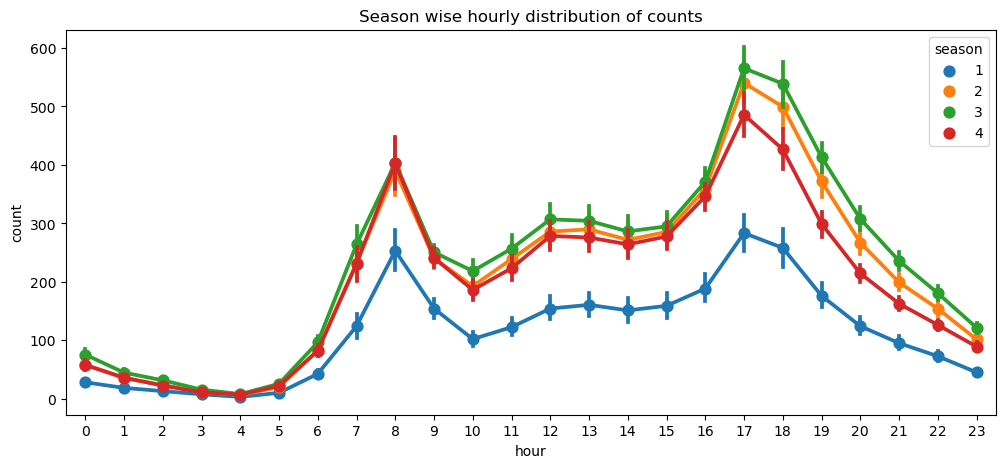

In [375]:
plt.figure(figsize=(12,5))
sns.pointplot(data=df1, x='hour', y='count', hue='season')
plt.title('Season wise hourly distribution of counts')

- For each season, most number of rentals happened during the rush hours (at morning between 7am-9am and at evening between 4pm-7pm)
- Also most rentals occured during season 1 and the least happened during season 1

## Season wise hourly distribution of user counts for weekdays

Text(0.5, 1.0, 'Season wise hourly distribution of counts')

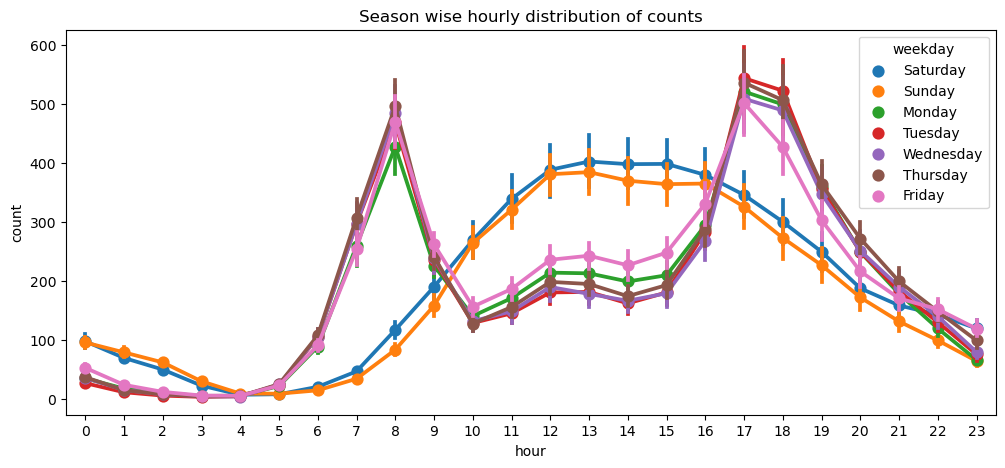

In [370]:
plt.figure(figsize=(12,5))
sns.pointplot(data=df1, x='hour', y='count', hue='weekday')
plt.title("Season wise hourly distribution of counts")

- For each working day, most number of rentals happened during the rush hours (at morning between 7am-9am and at evening between 4pm-7pm)
- During saturdays and sundays, most of the bike rentals happened during afternoon towards night time (between 10am-8pm)

## Binning features like temp, atemp, humidity and windspeed 

In [450]:
df1['season']=df1['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})
df1['weather']=df1['weather'].replace({1:'clear',2:'mist',3:'light snow',4:'heavy rain'})
df1['temp'] = pd.cut(df1['temp'],bins=[0,10,20,30,45],labels=['low_temp','medium_temp','normal_temp','high_temp'])
df1['atemp'] = pd.cut(df1['atemp'],bins=[0,15,25,35,50],labels=['low_temp','medium_temp','normal_temp','high_temp'])
df1['humidity'] = pd.cut(df1['humidity'],bins=[0,25,50,75,102],labels=['< 25%','< 50%','< 75%','< 100%'])
df1['windspeed'] = pd.cut(df1['windspeed'],bins=[-1,15,30,45,60],labels=['low speed','medium speed','high speed','very high speed'])

In [329]:
df1

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day
0,2011-01-01 00:00:00,spring,0,0,clear,low_temp,low_temp,< 100%,low speed,3,13,16,Saturday,2011,January,1
1,2011-01-01 01:00:00,spring,0,0,clear,low_temp,low_temp,< 100%,low speed,8,32,40,Saturday,2011,January,1
2,2011-01-01 02:00:00,spring,0,0,clear,low_temp,low_temp,< 100%,low speed,5,27,32,Saturday,2011,January,1
3,2011-01-01 03:00:00,spring,0,0,clear,low_temp,low_temp,< 75%,low speed,3,10,13,Saturday,2011,January,1
4,2011-01-01 04:00:00,spring,0,0,clear,low_temp,low_temp,< 75%,low speed,0,1,1,Saturday,2011,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,clear,medium_temp,medium_temp,< 50%,medium speed,7,329,336,Wednesday,2012,December,19
10882,2012-12-19 20:00:00,winter,0,1,clear,medium_temp,medium_temp,< 75%,medium speed,10,231,241,Wednesday,2012,December,19
10883,2012-12-19 21:00:00,winter,0,1,clear,medium_temp,medium_temp,< 75%,medium speed,4,164,168,Wednesday,2012,December,19
10884,2012-12-19 22:00:00,winter,0,1,clear,medium_temp,medium_temp,< 75%,low speed,12,117,129,Wednesday,2012,December,19


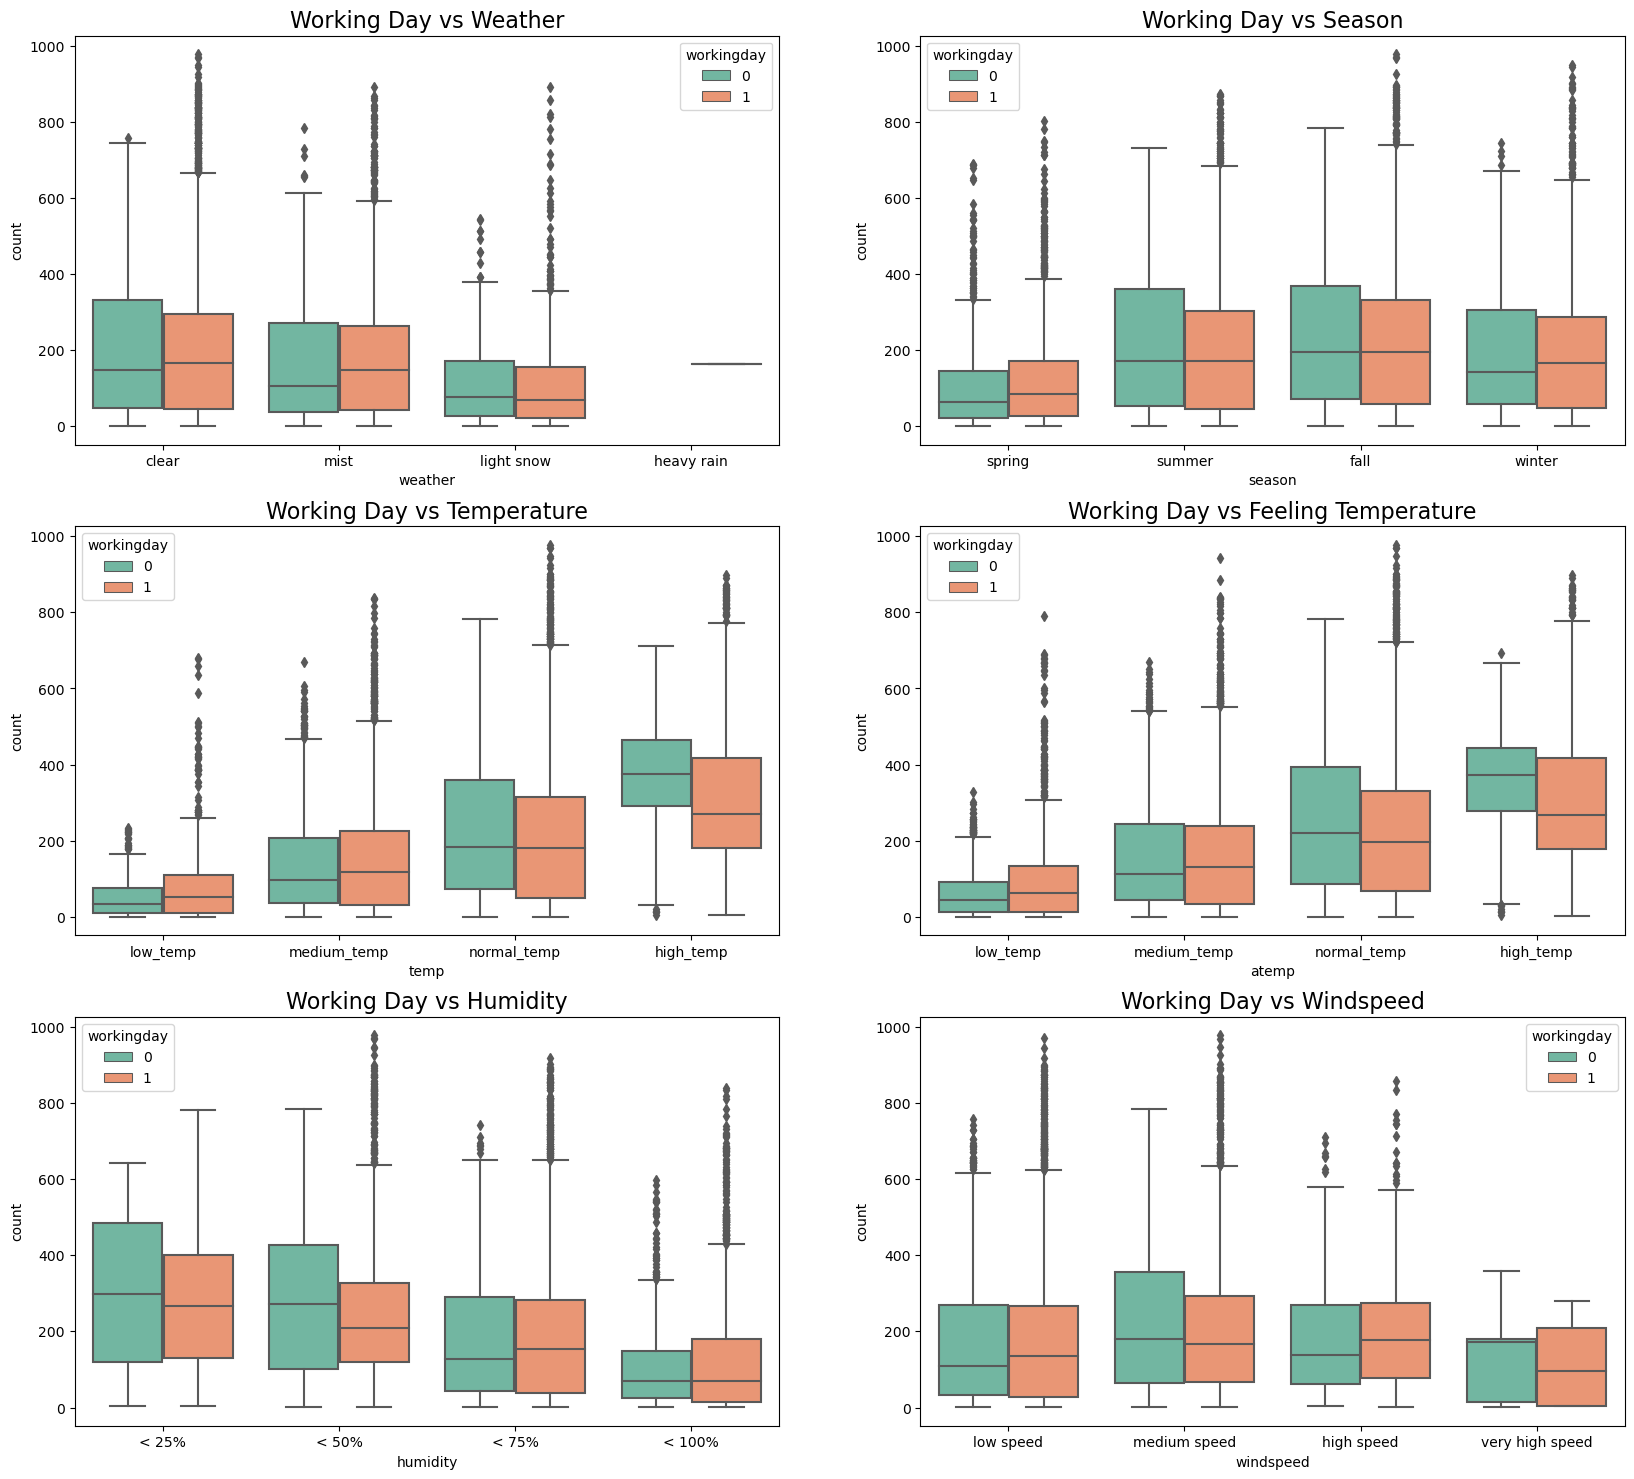

In [452]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df1, y='count', x='weather', hue='workingday', palette='Set2', ax=axis[0,0])
sns.boxplot(data=df1, y='count', x='season', hue='workingday', palette='Set2', ax=axis[0,1])
sns.boxplot(data=df1, y='count', x='temp', hue='workingday', palette='Set2', ax=axis[1,0])
sns.boxplot(data=df1, y='count', x='atemp', hue='workingday', palette='Set2', ax=axis[1,1])
sns.boxplot(data=df1, y='count', x='humidity', hue='workingday', palette='Set2', ax=axis[2,0])
sns.boxplot(data=df1, y='count', x='windspeed', hue='workingday', palette='Set2', ax=axis[2,1])

axis[0,0].set_title("Working Day vs Weather",fontsize=16)
axis[0,1].set_title("Working Day vs Season", fontsize=16)
axis[1,0].set_title("Working Day vs Temperature", fontsize=16)
axis[1,1].set_title("Working Day vs Feeling Temperature", fontsize=16)
axis[2,0].set_title("Working Day vs Humidity", fontsize=16)
axis[2,1].set_title("Working Day vs Windspeed", fontsize=16)
plt.show()

- Most number of bike rental happened when the weather is clear
- Most number of bike rental happened during summer and fall season
- Most number of bike rental happened for normal and higher temperature
- Most number of bike rental happened for normal and higher feeling temperature
- Most number of bike rental happened when the percentage humidity is lesser than 50 percent
- Most number of bike rental happened for lower and medium windspeed

##  Chi-square test to check if weather is dependent on the season

**Null Hypothesis (H0)**: Weather is independent of the season

**Alternate Hypothesis (H1)**: Weather is not independent of the season

**Significance level** (alpha): 0.05

In [208]:
df_ws = pd.crosstab(df.weather,df.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
Total,2686,2733,2733,2734,10886


In [234]:
# Above weather 4 has less expected count so not include 4 
df_w=df[-(df['weather']==4)]
df_ws = pd.crosstab(df_w.weather, df_w.season, margins=True, margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
Total,2685,2733,2733,2734,10885


In [244]:
stat, p_value, dof, expected = stats.chi2_contingency(df_ws)

print("p_value : ", p_value)
print("dof : ", dof)
print("expected : ", expected)

p_value :  6.664576536706683e-06
dof :  12
expected :  [[ 1774.04869086  1805.76352779  1805.76352779  1806.42425356
   7192.        ]
 [  699.06201194   711.55920992   711.55920992   711.81956821
   2834.        ]
 [  211.8892972    215.67726229   215.67726229   215.75617823
    859.        ]
 [ 2685.          2733.          2733.          2734.
  10885.        ]]


In [213]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Weather is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Weather is dependent on season ')

We reject the Null Hypothesis : Weather is dependent on season 


**We can see that p value is less than significant value (0.05) so we reject null hypothesis. So, Weather is
dependent on season**


## Chi-square test to check if workingday dependent on the season

**Null Hypothesis (H0)**: Workingday is Independent on season

**Alternate Hypothesis (H1)**: Workingday is dependent on season

**Significance level** (alpha): 0.05

In [214]:
df_count_season = pd.crosstab(df.workingday,df.season,margins=True,margins_name='Total')
df_count_season


season,1,2,3,4,Total
workingday,,,,,
0,858,840,888,888,3474
1,1828,1893,1845,1846,7412
Total,2686,2733,2733,2734,10886


In [243]:
stat, p_value, dof, expected = stats.chi2_contingency(df_count_season)

print("p_value : ", p_value)
print("dof : ", dof)
print("expected : ", expected)

p_value :  0.9583429307736173
dof :  8
expected :  [[  857.17104538   872.16994305   872.16994305   872.48906853
   3474.        ]
 [ 1828.82895462  1860.83005695  1860.83005695  1861.51093147
   7412.        ]
 [ 2686.          2733.          2733.          2734.
  10886.        ]]


In [216]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : Workingday is Independent on season  ')
else:
    print('We reject the Null Hypothesis : Workingday is dependent on season ')

We Accept the Null Hypothesis : Workingday is Independent on season  


**We can see that p value is greater than significant value(0.05) so we accept null hypothesis. So, Workingday is
Independent on season**

## ANOVA test to check if no. of bikes rented is similar or different across various season


**Null Hypothesis (H0)**: Number of cycles rented is similar in different season

**Alternate Hypothesis (H1)**: Number of cycles rented is not similar in different season

**Significance level** (alpha): 0.05

In [218]:
season_1 = df[df['season']==1]['count']
season_2 = df[df['season']==2]['count']
season_3 = df[df['season']==3]['count']
season_4 = df[df['season']==4]['count']

In [232]:
statistic, p_value  = stats.f_oneway(season_1,season_2,season_3,season_4)
print("statistic : ", statistic)
print("p value : ", p_value)

statistic :  236.94671081032106
p value :  6.164843386499654e-149


In [233]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes is similar across various season ')
else:
    print('We reject the Null Hypothesis : count of bikes is different across various season ')

We reject the Null Hypothesis : count of bikes is different across various season 


**We can see that p value is less than significant value(0.05) so we reject null hypothesis. So, Number of cycles rented is not similar in different season**

## ANOVA test to check if no. of bikes rented is similar or different across various weather

**Null Hypothesis (H0)**: Number of bikes rented is similar in different weather

**Alternate Hypothesis (H1)**: Number of bikes rented is not similar in different weather

**Significance level** (alpha): 0.05

In [236]:
weather_1 = df[df['weather']==1]['count']
weather_2 = df[df['weather']==2]['count']
weather_3 = df[df['weather']==3]['count']
weather_4 = df[df['weather']==4]['count']

In [237]:
statistic, p_value  = stats.f_oneway(weather_1,weather_2,weather_3,weather_4)
print("statistic : ", statistic)
print("p value : ", p_value)

statistic :  65.53024112793271
p value :  5.482069475935669e-42


In [238]:
alpha = 0.05
if p_value >= alpha: 
    print('We Accept the Null Hypothesis : count of bikes rented is similar across various weather ')
else:
    print('We reject the Null Hypothesis : count of bikes rented is different across various weather ')

We reject the Null Hypothesis : count of bikes is different across various weather 


**We can see that p value is less than significant value(0.05) so we reject null hypothesis. So, number of bikes rented is not similar in different weather**


### Insights & Recommendations :
- For the given data of bike rentals across 2 years, 2011 and 2012, the number of users in the year 2012 is much higher than that of the year 2011.
- When its a holiday more bikes are rented. It is also clear from the workingday also that when day is holiday or weekend, slightly more bikes were rented.
- When the humidity is less than 20, number of bikes rented is very very low & whenever the temperature is less than 10, number of bikes rented is less.
- In summer and fall seasons more bikes are rented as compared to other seasons. Also whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.
- For each season, most number of rentals happened during the rush hours (at morning between 7am-9am and at evening between 4pm-7pm)
- For each working day, most number of rentals happened during the rush hours (at morning between 7am-9am and at evening between 4pm-7pm). During saturdays and sundays, most of the bike rentals happened during afternoon towards night time (between 10am-8pm)
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- Whenever temprature is less than 10 or in very cold days, company should have less bikes.
- Whenever the windspeed is greater than 35 or in thunderstorms, company should have less bikes in stock to be rented.
- With a significance level of 0.05, weather has effect on the number of bikes being rented and also workingday has no effect on the number of bikes being rented.